# Artificial Neural Networks: A Brief Introduction

黄杰 2021.11

**Machine Learning And Artificial Neural Networks**

- **Deep learning** is a branch of what is called **machine learning**. 

- Machine learning  is "field of study that gives computers the **ability to learn without being explicitly programmed**."

- "Let the machine automatically **gain the ability to extract the structure behind it and apply it to unknown situations.**"

- Artificial neural networks/Deep neural networks/Deep learning

**Sigmoid Neuron**
![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_18_2021_11_01_11_3CIDZe.jpg)
- Input： $x_1, x_2, ...\in [0, 1]$
- Weights and bias
- Output/activation: $a = \sigma \left( \sum_{j} w_{j} x_{j} + b = w \cdot x + b \right )$
- Sigmoid function: $\sigma(x) = \frac{1}{1+e^{-x}}$

**Sigmoid function**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

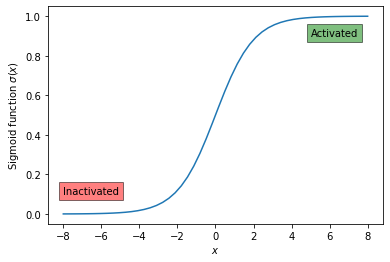

In [2]:
x= np.linspace(-8, 8, 50)
y = 1/(1+np.e**(-x))
plt.ylabel('Sigmoid function $\sigma (x)$')
plt.xlabel('$x$')
plt.text(5,0.9,'Activated', bbox=dict(facecolor='green', alpha=0.5))
plt.text(-8,0.1,'Inactivated', bbox=dict(facecolor='red', alpha=0.5))
plt.plot(x, y)
plt.show()

**The architecture of neural networks**

<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_19_deep_neural_network_big.png' width='40%' />

- Input layer
- Output layers
- Hidden layer 
- Fully connected

**Activations of  a layer**
<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_20_deep_neural_network_big.png' width='40%'/>

$$
\mathbf{z}_i = \mathbf{W}^i  \mathbf{a}_h + \mathbf{b}_i
$$

$a_{11} = \sigma \left ( w_{10}a_{00} + w_{11}a_{01} + w_{12}a_{02} + w_{13}a_{03} + b_{11}\right )$ 

$
\left[\begin{array}{l}a_{10} \\ a_{11} \\ a_{12} \\ a_{13} \\ a_{14} \end{array}\right]= \sigma \left ( \left[\begin{array}{llll}w_{00} & w_{01} & w_{02} & w_{13} \\ w_{10} & w_{11} & w_{12} & w_{13} \\ w_{20} & w_{21} & w_{22} & w_{23} \\ w_{30} & w_{31} & w_{32} & w_{33} \\ w_{40} & w_{41} & w_{42} & w_{43}\end{array}\right]\left[\begin{array}{l}a_{00} \\ a_{01} \\ a_{02} \\ a_{03}\end{array}\right]+\left[\begin{array}{l}b_{10} \\ b_{11} \\ b_{12} \\ b_{13} \\ b_{14}\end{array}\right] \right )
$

Number of layer 1 parameters: 5x4 + 5 = 25

Number of tatal parameters: 136

**Using neural nets to recognize handwritten digits**
![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_15_0e0n5t.jpg)
> Make everything as simple as possible, but not simpler.

- Find circle in image

## MNIST 
- Grey levels, 28x28
- **Supervised** data $\{\textbf{x}[i],  \textbf{y}[i]\}_{i=1, 2, ..., N}$
- $\textbf x[i]$,the $i$-th data value; $\textbf y[i]$, **label**
- Data-label **pair**: Training sample/data
![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_16_kFu6OJ.jpg)


**Vectorizing input**

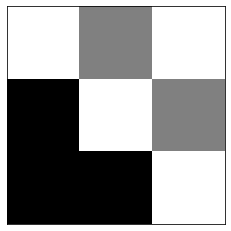

In [3]:
x = np.array([[1, 0.5, 1],
                        [0,   1,  0.5],
                        [0,   0,     1]])
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.show()

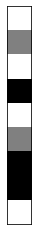

In [4]:
v_x = x.reshape((-1,1))
plt.imshow(v_x, cmap=plt.get_cmap('gray'))
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.show()

**One-hot representation of labels**

In [5]:
size = 10
nums = np.arange(size)
for label in range(size):
    one_hot = (nums==label).astype(np.int)
    print("Label: ", label, " in one-hot representation: ", one_hot)

Label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
Label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
Label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
Label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
Label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
Label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
Label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
Label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
Label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
Label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


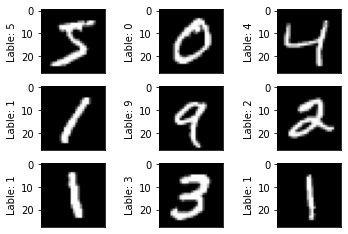

In [6]:
import mnist_loader
import matplotlib.pyplot as plt 
import numpy as np 

# loading
training_data, _, test_data = mnist_loader.load_data_wrapper()
temp_train = list(training_data)
temp_test = list(test_data)

# print('Training Sample Number: ' + str(len(temp_train)))
# print('Testing Sample Number: ' + str(len(temp_test)))


# plotting
for i in range(9):  
    plt.subplot(3, 3, i+1)
    plt.imshow(temp_train[i][0].reshape((28,28)), cmap=plt.get_cmap('gray'))
    plt.ylabel('Lable: {}'.format(np.argmax(temp_train[i][1])))
    plt.tick_params(bottom=False, labelbottom=False)
plt.show()

# # indexing
# print(temp_train[0][0])
# print(temp_train[0][1])

In [20]:
training = np.array(temp_train)

In [26]:
np.save('train_x.npy', training[:, 0])

## Neural Network Structure
![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_02_13_gakSOK.jpg)

- A training input $x$ : A 28x28 = 784 dimensional vector.
- The corresponding (lable) desired output: $y=y(x)$, where $y$ is a 10-dimensional vector.
- Training sample

## Objective
We'd like is an algorithm which lets us find weights and biases so that the output from the network approximates $y(x)$ for all training inputs $x$. 

To quantify how well we're achieving this goal we define a cost function:

$$
C(w, b) \equiv \frac{1}{n} \sum_{x} C_{x} = \frac{1}{2 n} \sum_{x}\|y(x)-a_{w,b}(x)\|^{2}
$$

- $w$, the collection of all weights in the network
- $b$, all the biases
- $n$, the total number of training inputs
- $a$, the vector of outputs from the network when $x$ is input
- Notation $\|v\|$ denotes the usual length function for a vector $v$.
- This cost function is also sometimes knowns as the mean squared error or MSE.

## How to find the right weights and biases?
Recapping, our goal in training a neural network is to find weights and biases which minimize the cost function $C(w,b)$. 

$$
w^{*}, b^{*}=\arg \min _{w, b} C(w,b)
$$

Okay, let's suppose we're trying to minimize some function, $C(v)$. This could be any real-valued function of many variables, $v=v1,v2,….$

<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_08_11_grediant.png' width = '50%'/>

$$
\Delta C \approx \frac{\partial C}{\partial v_{1}} \Delta v_{1}+\frac{\partial C}{\partial v_{2}} \Delta v_{2}
$$

We'll also define the **gradient** of $C$ to be the vector of partial derivatives, 

$$
\nabla C \equiv\left(\frac{\partial C}{\partial v_{1}}, \frac{\partial C}{\partial v_{2}}\right)^{T}
$$

$$
\Delta C \approx \nabla C \cdot \Delta v
$$

## Update policy
Choose 
$$
\Delta v=-\eta \nabla C
$$

$$
\Delta C \approx-\eta \nabla C \cdot \nabla C=-\eta\|\nabla C\|^{2}
$$

$$
v \rightarrow v^{\prime}=v-\eta \nabla C
$$

If we keep doing this, over and over, we'll keep decreasing $C$ until - we hope - we reach a global minimum.

$$
w_{k} \rightarrow w_{k}^{\prime}=w_{k}-\eta \frac{\partial C}{\partial w_{k}}
$$

$$
b_{l} \rightarrow b_{l}^{\prime}=b_{l}-\eta \frac{\partial C}{\partial b_{l}}
$$

- **Gradient descent**
- **Trianing**/learning process
- **Learning rate** $\eta$

## Stochastic gradient descent
$$
C=\frac{1}{n} \sum_{x} C_{x}
$$

$$
C_{x} \equiv \frac{\|y(x)-a\|^{2}}{2}
$$

In practice, to compute the gradient $\nabla C$ we need to compute the gradients $\nabla C_{x}$ separately for each training input, $x$, and then average them, $\nabla C=\frac{1}{n} \sum_{x} \nabla C_{x}$.

We'll label those random training inputs $X_1$,$X_2$,…,$X_m$, and refer to them as a mini-batch.

$$
\frac{\sum_{j=1}^{m} \nabla C_{X_{j}}}{m} \approx \frac{\sum_{x} \nabla C_{x}}{n}=\nabla C
$$

$$
\nabla C \approx \frac{1}{m} \sum_{j=1}^{m} \nabla C_{X_{j}}
$$

- Batch size
- Epoch

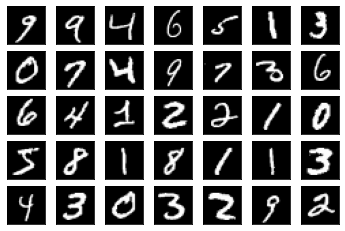

In [7]:
import random
indexes = np.arange(35)
random.shuffle(indexes)
for j, i in zip(range(35), indexes):  
    plt.subplot(5, 7, j+1)
    plt.imshow(temp_train[i][0].reshape((28,28)), cmap=plt.get_cmap('gray'))
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
plt.show()

## Implementing our network to classify digits
- Load training data 
- Training
- Save & load

In [8]:
import mnist_loader
import network

In [9]:
# Loading training data
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [10]:
# Building network
net = network.Network([784, 30, 10])

In [11]:
# Training
net.SGD(training_data, 30, 30, 1.0, test_data=test_data)

Epoch 0 : 5884 / 10000
Epoch 1 : 8276 / 10000
Epoch 2 : 8722 / 10000
Epoch 3 : 8884 / 10000
Epoch 4 : 8989 / 10000
Epoch 5 : 9029 / 10000
Epoch 6 : 9094 / 10000
Epoch 7 : 9127 / 10000
Epoch 8 : 9166 / 10000
Epoch 9 : 9189 / 10000
Epoch 10 : 9203 / 10000
Epoch 11 : 9236 / 10000
Epoch 12 : 9259 / 10000
Epoch 13 : 9267 / 10000
Epoch 14 : 9270 / 10000
Epoch 15 : 9311 / 10000
Epoch 16 : 9312 / 10000
Epoch 17 : 9320 / 10000
Epoch 18 : 9323 / 10000
Epoch 19 : 9324 / 10000
Epoch 20 : 9338 / 10000
Epoch 21 : 9346 / 10000
Epoch 22 : 9342 / 10000
Epoch 23 : 9358 / 10000
Epoch 24 : 9355 / 10000
Epoch 25 : 9348 / 10000
Epoch 26 : 9365 / 10000
Epoch 27 : 9380 / 10000
Epoch 28 : 9365 / 10000
Epoch 29 : 9379 / 10000


In [12]:
# Saving model
net.save_model()

Model saved.


(784, 1)
4


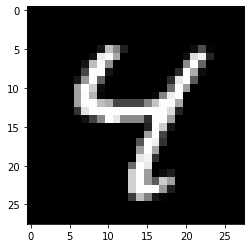

[[3.06010400e-08]
 [9.58476275e-10]
 [2.19950512e-08]
 [1.61312779e-07]
 [9.95880927e-01]
 [5.24587453e-04]
 [2.96612896e-05]
 [2.54354492e-06]
 [1.92385477e-05]
 [4.36974582e-03]]


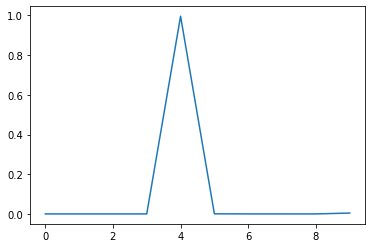

The prediction: 4


In [17]:
# Pridicting
testing_sample = temp_test[6]
x = testing_sample[0]
# print(x)
lable = testing_sample[1]
print(x.shape)
print(lable)
plt.imshow(x.reshape((28,28)), cmap=plt.get_cmap('gray'))
plt.show()

output = net.feedforward(x)
print(output)
plt.plot(output)
plt.show()

print('The prediction: {}'.format(np.argmax(output)))

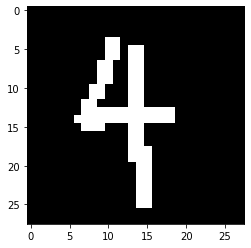

[[7.76997895e-09]
 [9.80522587e-03]
 [1.54273808e-07]
 [2.25085850e-04]
 [2.26919639e-05]
 [4.42203499e-03]
 [9.97284672e-06]
 [1.92876675e-09]
 [2.53608274e-02]
 [2.94940005e-05]]


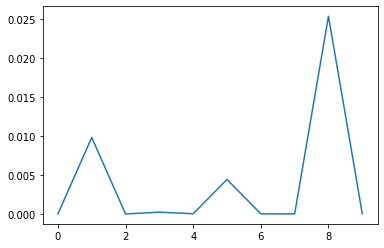

The prediction: 8


In [19]:
# Pridicting
x = np.load('test_img.npy')
plt.imshow(x.reshape((28,28)), cmap=plt.get_cmap('gray'))
plt.show()

output = net.feedforward(x)
print(output)
plt.plot(output)
plt.show()
print('The prediction: {}'.format(np.argmax(output)))

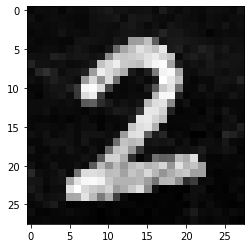

[[1.97913646e-06]
 [6.32694510e-07]
 [9.66503354e-01]
 [5.00704405e-01]
 [1.45298112e-11]
 [6.86387291e-07]
 [1.01506717e-08]
 [9.14911907e-05]
 [1.25570645e-06]
 [7.49046461e-10]]


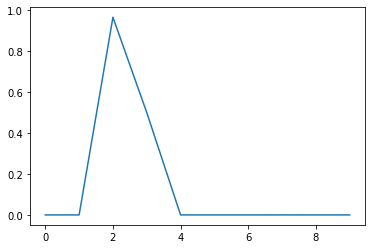

The prediction: 2


In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# reads image as grayscale
x = cv2.imread('test_imgs/2.png', 0) 
x = 255. - x
x = x/255.
x = cv2.resize(x, (28,28), interpolation= cv2.INTER_LINEAR)
plt.imshow(x, cmap='gray')
plt.show()


x = x.reshape((-1,1))
output = net.feedforward(x)
print(output)
plt.plot(output)
plt.show()
print('The prediction: {}'.format(np.argmax(output)))

# Summary
1. The architecture of neural networks
2. A classification problems using neural networks